In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file1 = "Resources/Hot 100 Audio Features.csv"
file2 = "Resources/Hot Stuff.csv"

audio_features = pd.read_csv(file1)
hot100 = pd.read_csv(file2)

merge_df = pd.merge(audio_features, hot100, on=["Song", "Performer", "SongID"], how="outer")

merge_df = merge_df.drop(["SongID", "spotify_track_id", "spotify_track_preview_url",
                         "spotify_track_album", "spotify_track_explicit", "time_signature",
                        "url", "key", "mode", "acousticness", "liveness", "valence", "spotify_genre"], axis=1)
#merge_df = merge_df.fillna(0)
merge_df.head()

new_df = merge_df.set_index(["Performer"])
new_df.reset_index()
new_df.head()

,Song,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,tempo,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,,,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/5/2019,86.0,1.0,NaN,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/12/2019,98.0,1.0,86.0,86.0,2.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/29/2019,100.0,1.0,NaN,100.0,1.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/6/2019,93.0,1.0,100.0,93.0,2.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2019,95.0,1.0,93.0,93.0,3.0


In [2]:
#merge_df["spotify_genre"].value_counts()
#new_df = merge_df[["Performer", "Song", "spotify_genre"]]

#new_df = new_df.set_index(["Performer", "Song"])
#newnew_df = new_df["spotify_genre"].str.split(pat=",", expand=True)
#newnew_df.reset_index().head()

In [3]:
new_df = new_df[["Song", "spotify_track_duration_ms", "tempo", 
                 "WeekID", "Week Position", "Peak Position", "Weeks on Chart"]]
new_df = new_df.dropna(how="any")
new_df

,Song,spotify_track_duration_ms,tempo,WeekID,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/5/2019,86.0,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/12/2019,98.0,86.0,2.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,10/13/2018,28.0,28.0,1.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,12/1/2018,23.0,5.0,8.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,2/2/2019,24.0,5.0,17.0
...,...,...,...,...,...,...,...
Solomon Burke,Tonight's The Night,161186.0,173.305,7/3/1965,32.0,32.0,6.0
Solomon Burke,Tonight's The Night,161186.0,173.305,7/10/1965,29.0,29.0,7.0
Solomon Burke,Tonight's The Night,161186.0,173.305,7/17/1965,28.0,28.0,8.0


In [4]:
new_df = new_df.rename(columns= {"spotify_track_duration_ms": "Length", "WeekID": "Date", "tempo": "Tempo"})
new_df.head()

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/5/2019,86.0,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/12/2019,98.0,86.0,2.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,10/13/2018,28.0,28.0,1.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,12/1/2018,23.0,5.0,8.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,2/2/2019,24.0,5.0,17.0


In [5]:
new_df.dtypes
#data types are appropriate (thank God)

Song               object
Length            float64
Tempo             float64
Date               object
Week Position     float64
Peak Position     float64
Weeks on Chart    float64
dtype: object

In [6]:
new_df.describe()
#tempo min: 0, max: 241, 25: 99, 50: 119, 75: 136- for bin reference

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,2.800390e+05,280039.000000,280039.000000,280039.000000,280039.000000
mean,2.292466e+05,120.031451,49.559797,40.343195,9.364606
std,6.507021e+04,27.766977,28.767562,29.215515,7.625508
min,2.968800e+04,0.000000,1.000000,1.000000,1.000000
25%,1.894260e+05,99.058000,25.000000,13.000000,4.000000
50%,2.250000e+05,118.552000,49.000000,37.000000,8.000000
75%,2.597330e+05,135.946000,74.000000,65.000000,13.000000
max,3.079157e+06,241.009000,100.000000,100.000000,87.000000


In [7]:
peak_df = new_df.sort_values(by="Peak Position")
peak_df = peak_df.drop_duplicates(["Song"], keep="last")

def convert(x):
    return round((x/1000),0)

def rounding(x):
    return round(x,0)
    
peak_df["Length"] = peak_df["Length"].apply(convert)
peak_df["Tempo"] = peak_df["Tempo"].apply(rounding)

peak_df = peak_df.loc[(peak_df["Peak Position"] <= 40)]
peak_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Drake,Nice For What,211.0,93.0,7/28/2018,4.0,1.0,15.0
Drake,God's Plan,199.0,77.0,2/3/2018,1.0,1.0,1.0
Ke$ha,We R Who We R,199.0,120.0,11/13/2010,1.0,1.0,1.0
Puff Daddy & Faith Evans Featuring 112,I'll Be Missing You,309.0,110.0,6/14/1997,1.0,1.0,1.0
Justin Bieber,What Do You Mean?,206.0,125.0,4/16/2016,41.0,1.0,31.0
...,...,...,...,...,...,...,...
Dixie Chicks,Goodbye Earl,259.0,123.0,3/18/2000,40.0,40.0,1.0
The Killers,Mr. Brightside,223.0,148.0,2/12/2005,40.0,40.0,1.0
Mariah Carey,Dreamlover,233.0,101.0,8/7/1993,40.0,40.0,1.0


In [8]:
def regress(x,y):
    import scipy.stats as st
    from scipy.stats import linregress
    corr = st.pearsonr(x, y)
    corr1 = corr[0]
    rsquare = round(corr1**2,6)
    print(f"The r-squared is: {rsquare}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"The regression line is: {line_eq}")

The r-squared is: 0.002604
The regression line is: y = 0.25x + 229.61


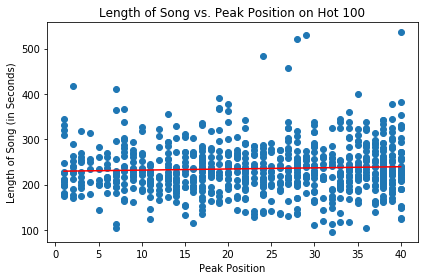

In [9]:
x_axis = peak_df["Peak Position"]
y_axis = peak_df["Length"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Peak Position")
plt.ylabel("Length of Song (in Seconds)")
plt.title("Length of Song vs. Peak Position on Hot 100")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsPeak.png")

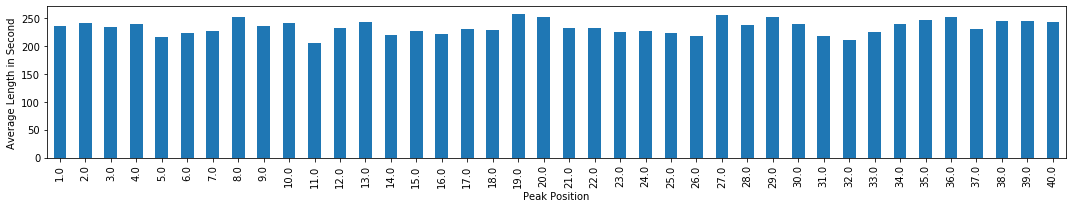

In [10]:
peak_df2 = peak_df.groupby(["Peak Position"])
avg = peak_df2["Length"].mean()

peakchart = avg.plot(kind="bar", figsize=(15,3))
peakchart.set_xlabel("Peak Position")
peakchart.set_ylabel("Average Length in Second")
plt.tight_layout()
plt.savefig("Images/LenvsPeakBar.png")

The r-squared is: 0.000629
The regression line is: y = 0.06x + 120.04


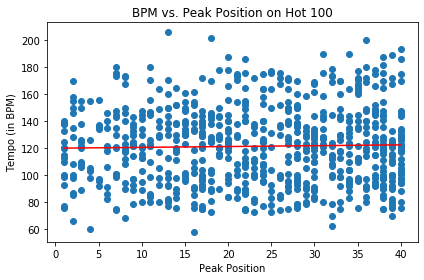

In [11]:
x_axis = peak_df["Peak Position"]
y_axis = peak_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Peak Position")
plt.ylabel("Tempo (in BPM)")
plt.title("BPM vs. Peak Position on Hot 100")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/bpmvsPeak.png")

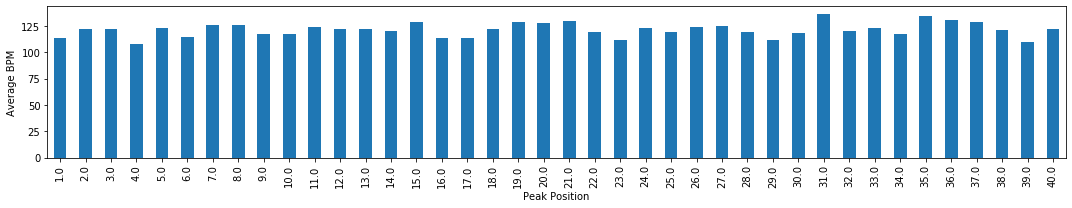

In [12]:
avg2 = peak_df2["Tempo"].mean()

peakchart2 = avg2.plot(kind="bar", figsize=(15,3))
peakchart2.set_xlabel("Peak Position")
peakchart2.set_ylabel("Average BPM")
plt.tight_layout()
plt.savefig("Images/bpmvsPeakBar.png")

In [13]:
time_df = new_df.loc[(new_df["Peak Position"] <= 40)]
time_df = time_df.sort_values(by="Weeks on Chart")
time_df = time_df.drop_duplicates(["Song"], keep="last")
    
time_df["Length"] = time_df["Length"].apply(convert)
time_df["Tempo"] = time_df["Tempo"].apply(rounding)

#time_df = time_df.loc[(time_df["Weeks on Chart"] > 10)]

time_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Lil Uzi Vert,Futsal Shuffle 2020,199.0,137.0,12/28/2019,5.0,5.0,1.0
Jordan Smith,Mary Did You Know,200.0,103.0,1/2/2016,24.0,24.0,1.0
5 Seconds Of Summer,Everything I Didn't Say,180.0,175.0,8/2/2014,24.0,24.0,1.0
PSY Featuring Snoop Dogg,Hangover,237.0,150.0,6/28/2014,26.0,26.0,1.0
Kanye West Featuring Clipse & Kenny G,Use This Gospel,214.0,148.0,11/9/2019,37.0,37.0,1.0
...,...,...,...,...,...,...,...
OneRepublic,Counting Stars,258.0,122.0,10/18/2014,50.0,2.0,68.0
LeAnn Rimes,How Do I Live,267.0,128.0,10/10/1998,45.0,2.0,69.0
Jason Mraz,I'm Yours,242.0,151.0,10/10/2009,48.0,6.0,76.0


The r-squared is: 0.045822
The regression line is: y = 1.75x + 194.01


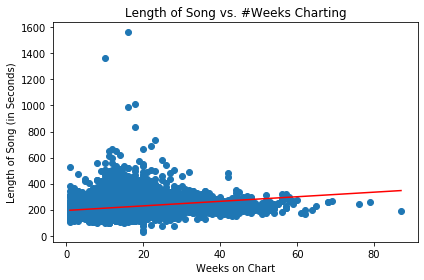

In [14]:
x_axis = time_df["Weeks on Chart"]
y_axis = time_df["Length"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weeks on Chart")
plt.ylabel("Length of Song (in Seconds)")
plt.title("Length of Song vs. #Weeks Charting")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsChart.png")

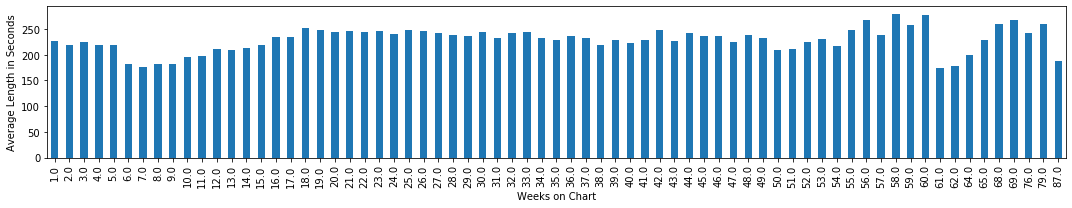

In [15]:
time_df2 = time_df.groupby(["Weeks on Chart"])
avg3 = time_df2["Length"].mean()

timechart = avg3.plot(kind="bar", figsize=(15,3))
timechart.set_xlabel("Weeks on Chart")
timechart.set_ylabel("Average Length in Seconds")
plt.tight_layout()
plt.savefig("Images/LenvsChartBar.png")

The r-squared is: 0.000351
The regression line is: y = -0.06x + 121.07


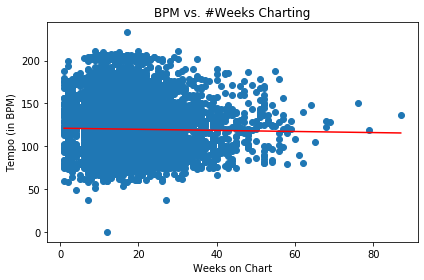

In [16]:
x_axis = time_df["Weeks on Chart"]
y_axis = time_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weeks on Chart")
plt.ylabel("Tempo (in BPM)")
plt.title("BPM vs. #Weeks Charting")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/bpmvsChart.png")

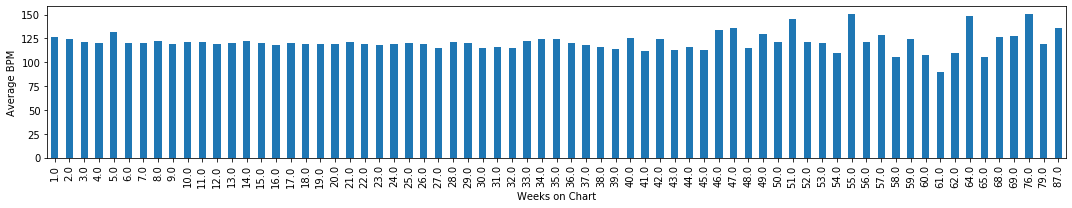

In [17]:
avg4 = time_df2["Tempo"].mean()

timechart2 = avg4.plot(kind="bar", figsize=(15,3))
timechart2.set_xlabel("Weeks on Chart")
timechart2.set_ylabel("Average BPM")
plt.tight_layout()
plt.savefig("Images/bpmvsChartBar.png")

In [18]:
compare_df = new_df.sort_values(by="Peak Position")
compare_df = compare_df.drop_duplicates(["Song"], keep="last")
    
compare_df["Length"] = compare_df["Length"].apply(convert)
compare_df["Tempo"] = compare_df["Tempo"].apply(rounding)

compare_df = compare_df.loc[(compare_df["Peak Position"] <= 40)]

The r-squared is: 0.001045
The regression line is: y = -0.02x + 125.37


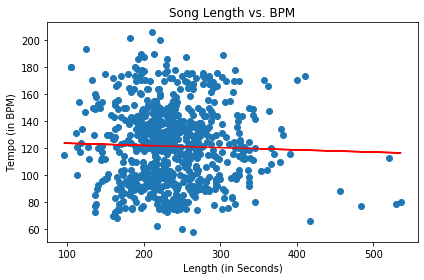

In [19]:
x_axis = compare_df["Length"]
y_axis = compare_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Length (in Seconds)")
plt.ylabel("Tempo (in BPM)")
plt.title("Song Length vs. BPM")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsBPM.png")

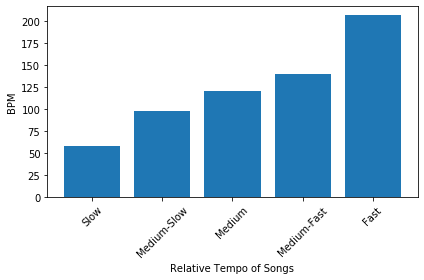

In [20]:
#tempo min: 0, max: 241, 25: 99, 50: 119, 75: 136- for bin reference

quartiles = compare_df["Tempo"].quantile([0, 0.25, 0.5, 0.75, 1])
lowest = round(quartiles[0],2)
lower = round(quartiles[0.25],2)
middle = round(quartiles[0.5],2)
higher = round(quartiles[0.75],2)
highest = round(quartiles[1],2)

tempos = [lowest, lower, middle, higher, highest]

x_axis = np.arange(len(tempos))
ticklocations = [value for value in x_axis]

#avg5 = compare_df2["Length"].mean()

plt.bar(x_axis, tempos, align="center")
plt.xticks(ticklocations, ["Slow", "Medium-Slow", "Medium", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("BPM")
plt.tight_layout()
plt.savefig("Images/BPMCategories.png")

In [21]:
compare_df.describe()

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,235.493298,121.508043,36.238606,23.483914,2.969169
std,56.293174,28.558158,23.326211,11.475232,3.925188
min,96.000000,58.000000,1.000000,1.000000,1.000000
25%,201.000000,98.000000,20.000000,14.000000,1.000000
50%,230.000000,121.000000,32.000000,24.000000,1.000000
75%,264.000000,140.000000,40.000000,34.000000,3.000000
max,536.000000,206.000000,100.000000,40.000000,31.000000


In [22]:
tempos

[58.0, 98.0, 121.0, 140.0, 206.0]

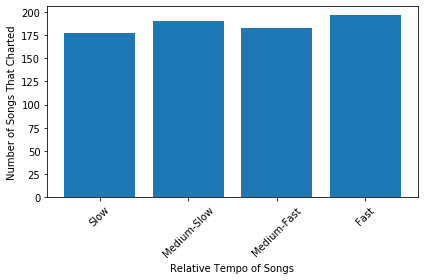

In [23]:
num1 = compare_df.loc[(compare_df["Tempo"] >= 58.0) & (compare_df["Tempo"] < 98.0)]
number1 = num1["Song"].count()

num2 = compare_df.loc[(compare_df["Tempo"] >= 98.0) & (compare_df["Tempo"] < 121.0)]
number2 = num2["Song"].count()

num3 = compare_df.loc[(compare_df["Tempo"] >= 121.0) & (compare_df["Tempo"] < 140.0)]
number3 = num3["Song"].count()

num4 = compare_df.loc[(compare_df["Tempo"] >= 140.0) & (compare_df["Tempo"] < 206.0)]
number4 = num4["Song"].count()

numbers = [number1, number2, number3, number4]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers, align="center")
plt.xticks([1,2,3,4], ["Slow", "Medium-Slow", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("Number of Songs That Charted")
plt.tight_layout()
plt.savefig("Images/BPMCategoriesperSong.png")

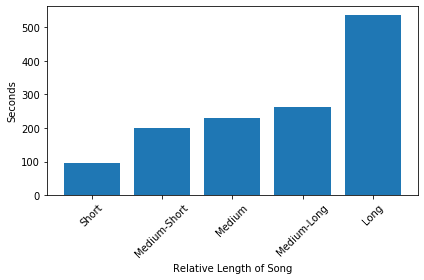

In [24]:
quartiles = compare_df["Length"].quantile([0, 0.25, 0.5, 0.75, 1])
lowest = round(quartiles[0],2)
lower = round(quartiles[0.25],2)
middle = round(quartiles[0.5],2)
higher = round(quartiles[0.75],2)
highest = round(quartiles[1],2)

lengths = [lowest, lower, middle, higher, highest]

x_axis = np.arange(len(lengths))
ticklocations = [value for value in x_axis]

plt.bar(x_axis, lengths, align="center")
plt.xticks(ticklocations, ["Short", "Medium-Short", "Medium", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Song")
plt.ylabel("Seconds")
plt.tight_layout()
plt.savefig("Images/LenCategories.png")

In [25]:
lengths

[96.0, 201.0, 230.0, 264.0, 536.0]

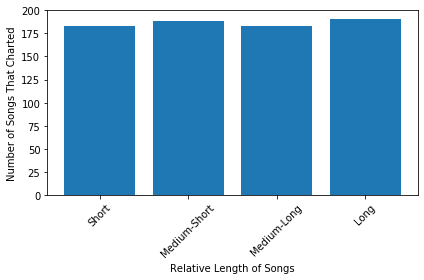

In [26]:
num5 = compare_df.loc[(compare_df["Length"] >= 96.0) & (compare_df["Length"] < 201.0)]
number5 = num5["Song"].count()

num6 = compare_df.loc[(compare_df["Length"] >= 201.0) & (compare_df["Length"] < 230.0)]
number6 = num6["Song"].count()

num7 = compare_df.loc[(compare_df["Length"] >= 230.0) & (compare_df["Length"] < 264.0)]
number7 = num7["Song"].count()

num8 = compare_df.loc[(compare_df["Length"] >= 264.0) & (compare_df["Length"] < 536.0)]
number8 = num8["Song"].count()

numbers2 = [number5, number6, number7, number8]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers2, align="center")
plt.xticks([1,2,3,4], ["Short", "Medium-Short", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Songs")
plt.ylabel("Number of Songs That Charted")
plt.tight_layout()
plt.savefig("Images/LenCategoriesperSong.png")

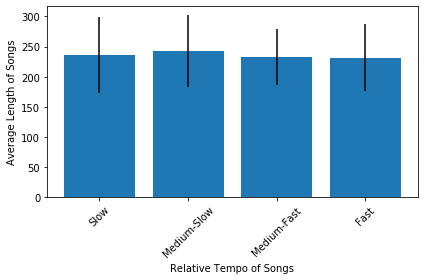

In [27]:
num9 = compare_df.loc[(compare_df["Tempo"] >= 58.0) & (compare_df["Tempo"] < 98.0)]
number9 = num9["Length"].mean()
std9 = num9["Length"].std()

num10 = compare_df.loc[(compare_df["Tempo"] >= 98.0) & (compare_df["Tempo"] < 121.0)]
number10 = num10["Length"].mean()
std10 = num10["Length"].std()

num11 = compare_df.loc[(compare_df["Tempo"] >= 121.0) & (compare_df["Tempo"] < 140.0)]
number11 = num11["Length"].mean()
std11 = num11["Length"].std()

num12 = compare_df.loc[(compare_df["Tempo"] >= 140.0) & (compare_df["Tempo"] < 206.0)]
number12 = num12["Length"].mean()
std12 = num12["Length"].std()

numbers3 = [number9, number10, number11, number12]
error3 = [std9, std10, std11, std12]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers3, yerr=error3, align="center")
plt.xticks([1,2,3,4], ["Slow", "Medium-Slow", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("Average Length of Songs")
plt.tight_layout()
plt.savefig("Images/BPMCategoriesperLen.png")

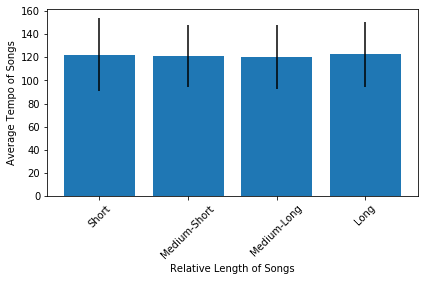

In [28]:
num13 = compare_df.loc[(compare_df["Length"] >= 96.0) & (compare_df["Length"] < 201.0)]
number13 = num13["Tempo"].mean()
std13 = num13["Tempo"].std()

num14 = compare_df.loc[(compare_df["Length"] >= 201.0) & (compare_df["Length"] < 230.0)]
number14 = num14["Tempo"].mean()
std14 = num14["Tempo"].std()

num15 = compare_df.loc[(compare_df["Length"] >= 230.0) & (compare_df["Length"] < 264.0)]
number15 = num15["Tempo"].mean()
std15 = num15["Tempo"].std()

num16 = compare_df.loc[(compare_df["Length"] >= 264.0) & (compare_df["Length"] < 536.0)]
number16 = num16["Tempo"].mean()
std16 = num16["Tempo"].std()

numbers4 = [number13, number14, number15, number16]
error4 = [std13, std14, std15, std16]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers4, yerr=error4, align="center")
plt.xticks([1,2,3,4], ["Short", "Medium-Short", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Songs")
plt.ylabel("Average Tempo of Songs")
plt.tight_layout()
plt.savefig("Images/LenCategoriesperBPM.png")

In [29]:
compare2_df = new_df.sort_values(by="Peak Position")
compare2_df = compare2_df.drop_duplicates(["Song"], keep="last")
    
compare2_df["Length"] = compare2_df["Length"].apply(convert)
compare2_df["Tempo"] = compare2_df["Tempo"].apply(rounding)

compare2_df = compare2_df.loc[(compare2_df["Peak Position"] <= 40)]
compare2_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Drake,Nice For What,211.0,93.0,7/28/2018,4.0,1.0,15.0
Drake,God's Plan,199.0,77.0,2/3/2018,1.0,1.0,1.0
Ke$ha,We R Who We R,199.0,120.0,11/13/2010,1.0,1.0,1.0
Puff Daddy & Faith Evans Featuring 112,I'll Be Missing You,309.0,110.0,6/14/1997,1.0,1.0,1.0
Justin Bieber,What Do You Mean?,206.0,125.0,4/16/2016,41.0,1.0,31.0
...,...,...,...,...,...,...,...
Dixie Chicks,Goodbye Earl,259.0,123.0,3/18/2000,40.0,40.0,1.0
The Killers,Mr. Brightside,223.0,148.0,2/12/2005,40.0,40.0,1.0
Mariah Carey,Dreamlover,233.0,101.0,8/7/1993,40.0,40.0,1.0


In [30]:
compare2_df = compare2_df.set_index(["Song"])
compare2_df = compare2_df[["Length", "Tempo"]]
compare2_df

,Length,Tempo
Song,,
Nice For What,211.0,93.0
God's Plan,199.0,77.0
We R Who We R,199.0,120.0
I'll Be Missing You,309.0,110.0
What Do You Mean?,206.0,125.0
...,...,...
Goodbye Earl,259.0,123.0
Mr. Brightside,223.0,148.0
Dreamlover,233.0,101.0


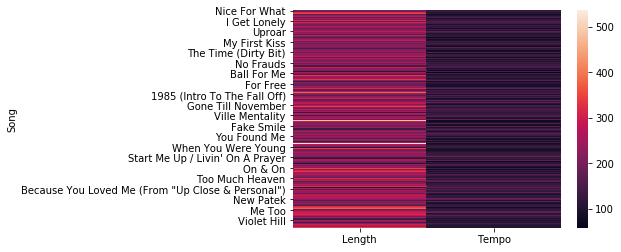

In [31]:
sns.heatmap(compare2_df)

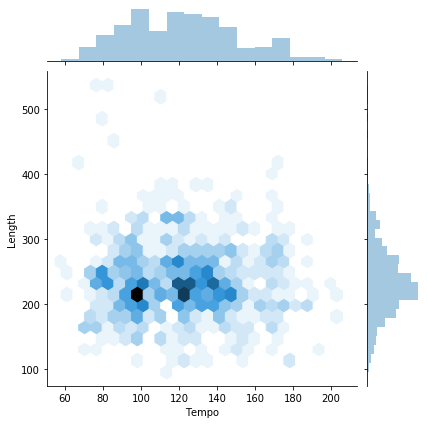

In [39]:

x = compare2_df["Tempo"]
y = compare2_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Tempo", y="Length", data=compare2_df, kind="hex")
plt.savefig("Images/LenvsBPMheatmap.png")

In [72]:
compare3_df = new_df.sort_values(by="Weeks on Chart")
compare3_df = compare3_df.drop_duplicates(["Song"], keep="last")
    
compare3_df["Length"] = compare3_df["Length"].apply(convert)
compare3_df["Tempo"] = compare3_df["Tempo"].apply(rounding)

compare3_df = compare3_df.loc[(compare3_df["Peak Position"] <= 40)]
compare3_df = compare3_df.loc[(compare3_df["Length"] < 377) & (compare3_df["Length"] > 61)]
compare3_df = compare3_df.loc[(compare3_df["Tempo"] > 48) & (compare3_df["Tempo"] < 188)]
compare3_df.describe()

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,219.759300,118.662109,66.001272,16.560148,17.522629
std,54.281198,25.855268,24.408873,12.028351,8.099746
min,75.000000,51.000000,1.000000,1.000000,1.000000
25%,178.000000,99.000000,45.000000,6.000000,12.000000
50%,219.000000,118.000000,61.000000,14.000000,17.000000
75%,255.500000,134.000000,93.000000,27.000000,20.000000
max,376.000000,187.000000,100.000000,40.000000,87.000000


In [71]:
iqr1 = (258 - 179)
lower1 = 179 - (1.5*iqr1)
upper1 = 258 + (1.5*iqr1)

print(f"{lower1} {upper1}")

iqr2 = (135 - 100)
lower2 = 100 - (1.5*iqr2)
upper2 = 135 + (1.5*iqr2)

print(f"{lower2} {upper2}")

60.5 376.5
47.5 187.5


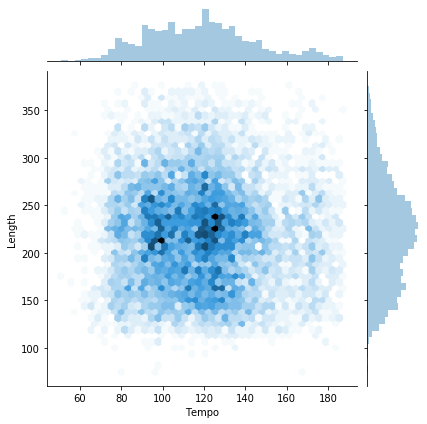

In [73]:
x = compare3_df["Tempo"]
y = compare3_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

sns.jointplot(x="Tempo", y="Length", data=compare3_df, kind="hex")
plt.savefig("Images/LenvsBPMheatmap2.png")

In [53]:
date_df = new_df.sort_values(by="Peak Position")
date_df = date_df.drop_duplicates(["Song"], keep="last")

date_df["Date"] = pd.to_datetime(date_df["Date"])
    
date_df["Length"] = date_df["Length"].apply(convert)
date_df["Tempo"] = date_df["Tempo"].apply(rounding)

date_df = date_df.loc[(date_df["Peak Position"] <= 40)]

date_df = date_df.sort_values(by="Date") 